In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_parquet("/media/pankhuri/MData/safe_dataset.sample/sample/part-00000-34d9b361-ea79-42eb-82ee-9c9f9259c339-c000.snappy.parquet", engine='pyarrow')

In [6]:
df.head()

,argument_0,argument_1,argument_2,argument_3,argument_4,argument_5,argument_6,argument_7,argument_8,arguments,...,script_line,script_loc_eval,script_url,symbol,time_stamp,value,value_1000,value_len,valid,errors
0,,,,,,,,,,{},...,57,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.079,fb_xdm_frame_https,fb_xdm_frame_https,18,True,
1,,,,,,,,,,{},...,57,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.080,fb_xdm_frame_https,fb_xdm_frame_https,18,True,
2,,,,,,,,,,{},...,57,,https://staticxx.facebook.com/connect/xd_arbit...,window.document.cookie,2017-12-16 02:54:10.086,,,0,True,
3,,,,,,,,,,{},...,49,,https://staticxx.facebook.com/connect/xd_arbit...,window.navigator.userAgent,2017-12-16 02:54:10.088,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,
4,,,,,,,,,,{},...,25,,https://ajax.googleapis.com/ajax/libs/webfont/...,window.navigator.userAgent,2017-12-16 07:12:07.104,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,


## Initial Analysis

To more easily see the column names and kind of values they hold, transpose of the head is taken

In [7]:
sample_cols=df.T

In [8]:
sample_cols

,0,1,2,3,4,5,6,7,8,9,...,9224,9225,9226,9227,9228,9229,9230,9231,9232,9233
argument_0,,,,,,,,,,,...,,,,,,,,,,
argument_1,,,,,,,,,,,...,,,,,,,,,,
argument_2,,,,,,,,,,,...,,,,,,,,,,
argument_3,,,,,,,,,,,...,,,,,,,,,,
argument_4,,,,,,,,,,,...,,,,,,,,,,
argument_5,,,,,,,,,,,...,,,,,,,,,,
argument_6,,,,,,,,,,,...,,,,,,,,,,
argument_7,,,,,,,,,,,...,,,,,,,,,,
argument_8,,,,,,,,,,,...,,,,,,,,,,
arguments,{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{}


In [9]:
df.dtypes

argument_0                  object
argument_1                  object
argument_2                  object
argument_3                  object
argument_4                  object
argument_5                  object
argument_6                  object
argument_7                  object
argument_8                  object
arguments                   object
arguments_n_keys             int64
call_id                     object
call_stack                  object
crawl_id                     int64
file_name                   object
func_name                   object
in_iframe                     bool
location                    object
operation                   object
script_col                  object
script_line                 object
script_loc_eval             object
script_url                  object
symbol                      object
time_stamp          datetime64[ns]
value                       object
value_1000                  object
value_len                    int32
valid               

In [10]:
df.describe()

,arguments_n_keys,crawl_id,value_len
count,9234.000000,9234.0,9234.000000
mean,0.259368,1.0,347.945636
std,0.730412,0.0,2529.274714
min,0.000000,1.0,0.000000
25%,0.000000,1.0,2.000000
50%,0.000000,1.0,68.000000
75%,0.000000,1.0,139.000000
max,6.000000,1.0,103878.000000


## Preliminary Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
df['location'].head(20)

0     https://staticxx.facebook.com/connect/xd_arbit...
1     https://staticxx.facebook.com/connect/xd_arbit...
2     https://staticxx.facebook.com/connect/xd_arbit...
3     https://staticxx.facebook.com/connect/xd_arbit...
4     https://cas.us.criteo.com/delivery/r/afr.php?d...
5     http://pos.baidu.com/rcwm?rdid=2835655&dc=3&di...
6     https://staticxx.facebook.com/connect/xd_arbit...
7     https://staticxx.facebook.com/connect/xd_arbit...
8     https://staticxx.facebook.com/connect/xd_arbit...
9     https://staticxx.facebook.com/connect/xd_arbit...
10             https://www.jumia.co.ke/shipping_policy/
11             https://www.jumia.co.ke/shipping_policy/
12             https://www.jumia.co.ke/shipping_policy/
13                      https://www.syracuse.edu/about/
14                      https://www.syracuse.edu/about/
15                      https://www.syracuse.edu/about/
16                      https://www.syracuse.edu/about/
17                      https://www.syracuse.edu

In [13]:
def split_for_location(s):
    a=s.split('/')
    return a[2]

In [14]:
df['filter_location']=df['location'].apply(split_for_location)

In [15]:
df.head(5)

,argument_0,argument_1,argument_2,argument_3,argument_4,argument_5,argument_6,argument_7,argument_8,arguments,...,script_loc_eval,script_url,symbol,time_stamp,value,value_1000,value_len,valid,errors,filter_location
0,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.079,fb_xdm_frame_https,fb_xdm_frame_https,18,True,,staticxx.facebook.com
1,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.080,fb_xdm_frame_https,fb_xdm_frame_https,18,True,,staticxx.facebook.com
2,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.document.cookie,2017-12-16 02:54:10.086,,,0,True,,staticxx.facebook.com
3,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.navigator.userAgent,2017-12-16 02:54:10.088,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,,staticxx.facebook.com
4,,,,,,,,,,{},...,,https://ajax.googleapis.com/ajax/libs/webfont/...,window.navigator.userAgent,2017-12-16 07:12:07.104,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,,cas.us.criteo.com


In [16]:
from matplotlib import rcParams

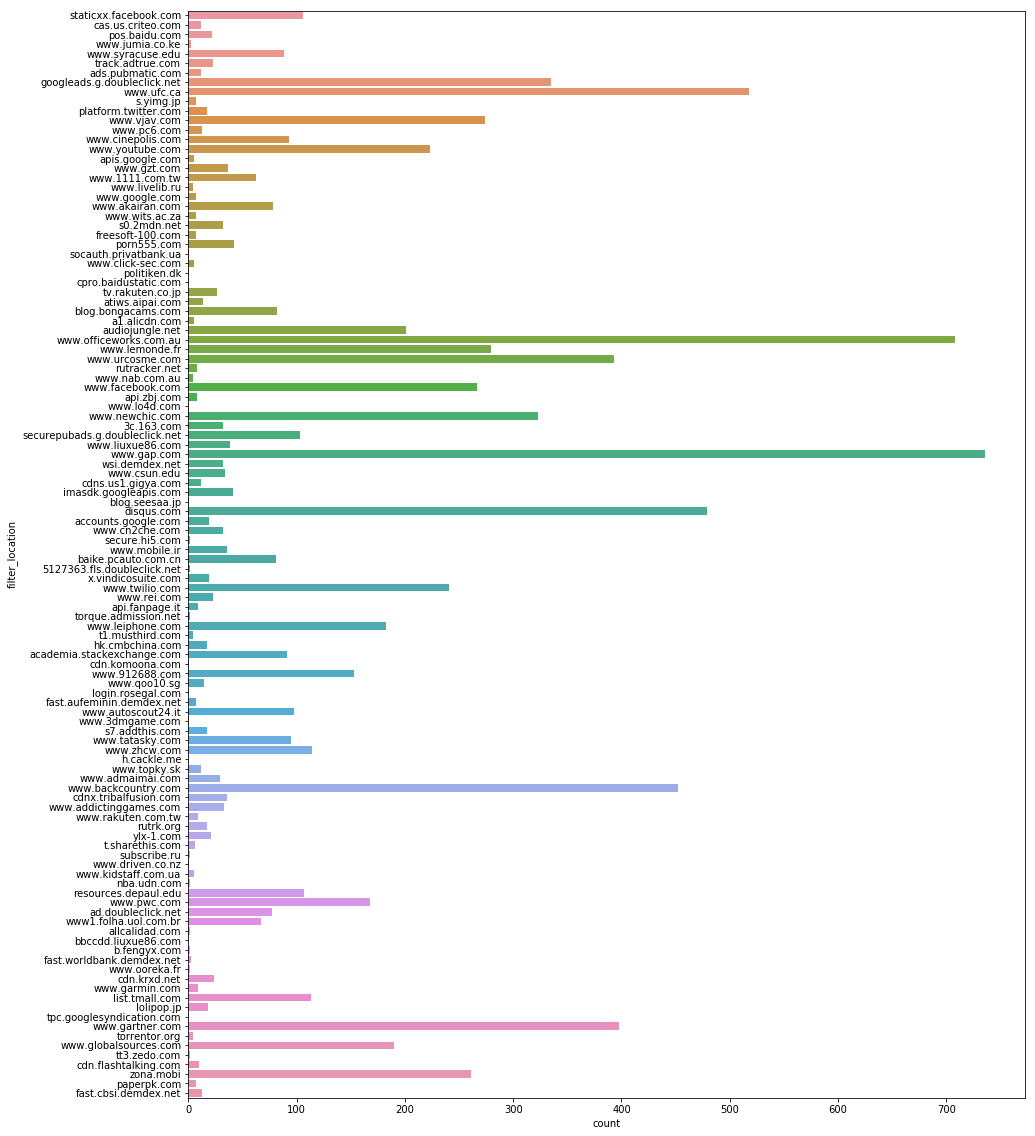

In [17]:
plt.figure(figsize=(15,20))
fig=sns.countplot(y='filter_location', data=df)

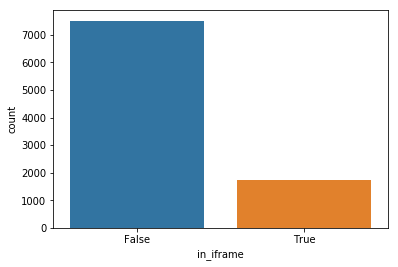

In [18]:
sns.countplot(x='in_iframe', data=df)

Most of the scripts are not embedded in other documents

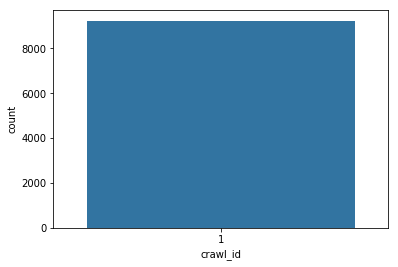

In [19]:
sns.countplot(x='crawl_id', data=df)

All have crawl_id as "1". Therefore, for this sample, "crawl_id" is a redundant column.

In [20]:
df.filter_location.unique()

array(['staticxx.facebook.com', 'cas.us.criteo.com', 'pos.baidu.com',
       'www.jumia.co.ke', 'www.syracuse.edu', 'track.adtrue.com',
       'ads.pubmatic.com', 'googleads.g.doubleclick.net', 'www.ufc.ca',
       's.yimg.jp', 'platform.twitter.com', 'www.vjav.com', 'www.pc6.com',
       'www.cinepolis.com', 'www.youtube.com', 'apis.google.com',
       'www.gzt.com', 'www.1111.com.tw', 'www.livelib.ru',
       'www.google.com', 'www.akairan.com', 'www.wits.ac.za',
       's0.2mdn.net', 'freesoft-100.com', 'porn555.com',
       'socauth.privatbank.ua', 'www.click-sec.com', 'politiken.dk',
       'cpro.baidustatic.com', 'tv.rakuten.co.jp', 'atiws.aipai.com',
       'blog.bongacams.com', 'a1.alicdn.com', 'audiojungle.net',
       'www.officeworks.com.au', 'www.lemonde.fr', 'www.urcosme.com',
       'rutracker.net', 'www.nab.com.au', 'www.facebook.com',
       'api.zbj.com', 'www.lo4d.com', 'www.newchic.com', '3c.163.com',
       'securepubads.g.doubleclick.net', 'www.liuxue86.com',
     

In [21]:
file_counts= df['file_name'].value_counts().to_dict()
file_counts

{'1_447020528f39d60852fadd88207fbee808db44678d10ce5df31a2171.json': 736,
 '1_2ca7c8942ef71c0b012aecded1a2cdda195cfaf11f92cd88c72a621b.json': 708,
 '1_0b59347f9b5c7acf14fca111bbfce3322e83e777aa67bb4b71ffead1.json': 518,
 '1_b025811b15b17cf7bf071a5b322668f076306ca12d9c6b7215d6d583.json': 452,
 '1_f001bb59462bc80ee8ec9e6592b571d0a465cf3e05665953e71b9fe9.json': 398,
 '1_34ec05e78c7f309ae4aa5e31a16b7b3149a2347c41ca43c2825e4052.json': 393,
 '1_3eb281b4819d77fd439f16ccfca5bca001e412654c0c26da08736c1d.json': 323,
 '1_9270964e083e12dfd3057445dd0cd0f58afb69b4d387b67262647f28.json': 304,
 '1_308c9473f2205655f84d2104ac0fbb8227fb2a7bb581b4315daf41eb.json': 280,
 '1_0f98444f4e1b012d36e673946689fd30ce37ef0ee71bc3f9f31981e2.json': 274,
 '1_fb7bbc059059b47e93d382a08df32421d04ec1f03082c0d8be04a5fe.json': 261,
 '1_8466b40bb6086f592eca129996d9067fe202afaa2c131c88f0ba7f32.json': 241,
 '1_50c245dc9814242dbb9540d3e7b626ca82cb869b2bb90a891fc87750.json': 228,
 '1_2bf1e3bbedc397dd374c204602cd043995748173ba0424e

In [74]:
call_stack_counts= df['call_stack'].value_counts().to_dict()
call_stack_counts

{'': 5844,
 'Xa@https://cdn.optimizely.com/js/3523710858.js:311:482\nH@https://cdn.optimizely.com/js/3523710858.js:311:288\nvg@https://cdn.optimizely.com/js/3523710858.js:460:107\nt/<@https://cdn.optimizely.com/js/3523710858.js:304:294\nL/<@https://cdn.optimizely.com/js/3523710858.js:316:908\nD@https://cdn.optimizely.com/js/3523710858.js:317:65\nL@https://cdn.optimizely.com/js/3523710858.js:316:889\nvg/c.or@https://cdn.optimizely.com/js/3523710858.js:458:85\nvg@https://cdn.optimizely.com/js/3523710858.js:458:220\nt/<@https://cdn.optimizely.com/js/3523710858.js:304:294\nL/<@https://cdn.optimizely.com/js/3523710858.js:316:908\nD@https://cdn.optimizely.com/js/3523710858.js:317:65\nL@https://cdn.optimizely.com/js/3523710858.js:316:889\nvg/c.or@https://cdn.optimizely.com/js/3523710858.js:458:85\nvg@https://cdn.optimizely.com/js/3523710858.js:458:220\nt/<@https://cdn.optimizely.com/js/3523710858.js:304:294\nHb/<@https://cdn.optimizely.com/js/3523710858.js:316:838\nD@https://cdn.optimizely.co

In [75]:
call_id_counts= df['call_id'].value_counts().to_dict()
call_id_counts

{'1_50c245dc9814242dbb9540d3e7b626ca82cb869b2bb90a891fc87750.json__84': 1,
 '1_2bf1e3bbedc397dd374c204602cd043995748173ba0424e340c4de15.json__58': 1,
 '1_21ead3e5d2a740092331bb2182ca7cf40000fc9200ce4e19b6053adb.json__22': 1,
 '1_e69596cc13d13e3df2600f3ea135b505bd67767f09e33246c9a3fdfc.json__79': 1,
 '1_39d0a37d7e4b27d474e57545fee5aac7af81140895de54a3d3fc5c27.json__26': 1,
 '1_0b59347f9b5c7acf14fca111bbfce3322e83e777aa67bb4b71ffead1.json__398': 1,
 '1_fb7bbc059059b47e93d382a08df32421d04ec1f03082c0d8be04a5fe.json__97': 1,
 '1_447020528f39d60852fadd88207fbee808db44678d10ce5df31a2171.json__78': 1,
 '1_3eb281b4819d77fd439f16ccfca5bca001e412654c0c26da08736c1d.json__173': 1,
 '1_9224b0a28825761fce9f52a2aa4b34a0d61bde5fb525a0165a4f9017.json__146': 1,
 '1_2bbcc9549f58022b8214f63742c8e07369aa56b7497e55a7ed769f7d.json__4': 1,
 '1_98bf622f205cd9937096aba783b9af5d9e036168834c84f85187c86f.json__88': 1,
 '1_0b59347f9b5c7acf14fca111bbfce3322e83e777aa67bb4b71ffead1.json__37': 1,
 '1_95d895fe662d09a387a

Call ID are unique values

In [76]:
location_counts= df['location'].value_counts().to_dict()
location_counts

{'http://www.gap.com/browse/category.do?cid=1096402&sop=true': 736,
 'https://www.officeworks.com.au/shop/officeworks/c/technology/hard-drives-data-storage/cd-dvd-media/dvdplus-rw': 708,
 'http://www.ufc.ca/media/Submission-of-the-Week-Mickey-Gall-vs-Mike-Jackson': 518,
 'https://www.backcountry.com/travel?show=all&p=gender%3Amale%7Cattr_age%3Aadult&nf=12': 452,
 'https://www.gartner.com/events/emea/customer-experience': 398,
 'https://www.urcosme.com/beauty_diary/475693/reviews': 393,
 'https://www.newchic.com/vintage-dresses-c-3664/': 323,
 'https://disqus.com/embed/comments/?base=default&f=sofifa&t_u=http%3A%2F%2Fsofifa.com%2Fplayer%2F231443&t_e=O.%20Demb%C3%A9l%C3%A9%20-%20Player%20-%20SoFIFA&t_d=Ousmane%20Demb%C3%A9l%C3%A9%20FIFA%2018%20Dec%2014%2C%202017%20SoFIFA&t_t=O.%20Demb%C3%A9l%C3%A9%20-%20Player%20-%20SoFIFA&s_o=default&l=en#version=8e0609b122e4529350708e7c7b2d6a12': 304,
 'http://www.lemonde.fr/service/licence_et_droits_de_reproduction.html': 280,
 'https://www.vjav.com/t

In [77]:
script_url_counts= df['script_url'].value_counts().to_dict()
script_url_counts

{'https://www.google-analytics.com/analytics.js': 925,
 'https://mc.yandex.ru/metrika/watch.js': 422,
 'https://securepubads.g.doubleclick.net/gpt/pubads_impl_170.js': 313,
 'https://dnn506yrbagrg.cloudfront.net/pages/scripts/0056/3437.js?420392': 288,
 'https://libs.coremetrics.com/eluminate.js': 231,
 'https://c.disquscdn.com/next/embed/lounge.bundle.8d07a4869c3ec17ee1881ae6bd353027.js': 231,
 'http://cdn.optimizely.com/public/6529002483/s/gacat.js': 211,
 'https://static.xx.fbcdn.net/rsrc.php/v3iUNm4/y2/l/en_US/zwe_8Udp_Zd.js': 210,
 'https://ssl.google-analytics.com/ga.js': 206,
 'https://cdn.krxd.net/ctjs/controltag.js.c3e8e6311e44dfc4f051e4a261784fa1': 175,
 'https://cdn.optimizely.com/js/3523710858.js': 173,
 'http://static.chartbeat.com/js/chartbeat_video.js': 128,
 'https://biberukalap.com/1011165a059.1.n.2.1.js': 127,
 'https://cdn.dynamicyield.com/api/8768466/api_static.js': 119,
 'https://static.criteo.net/js/ld/ld.js': 108,
 'http://www.google-analytics.com/analytics.js': 

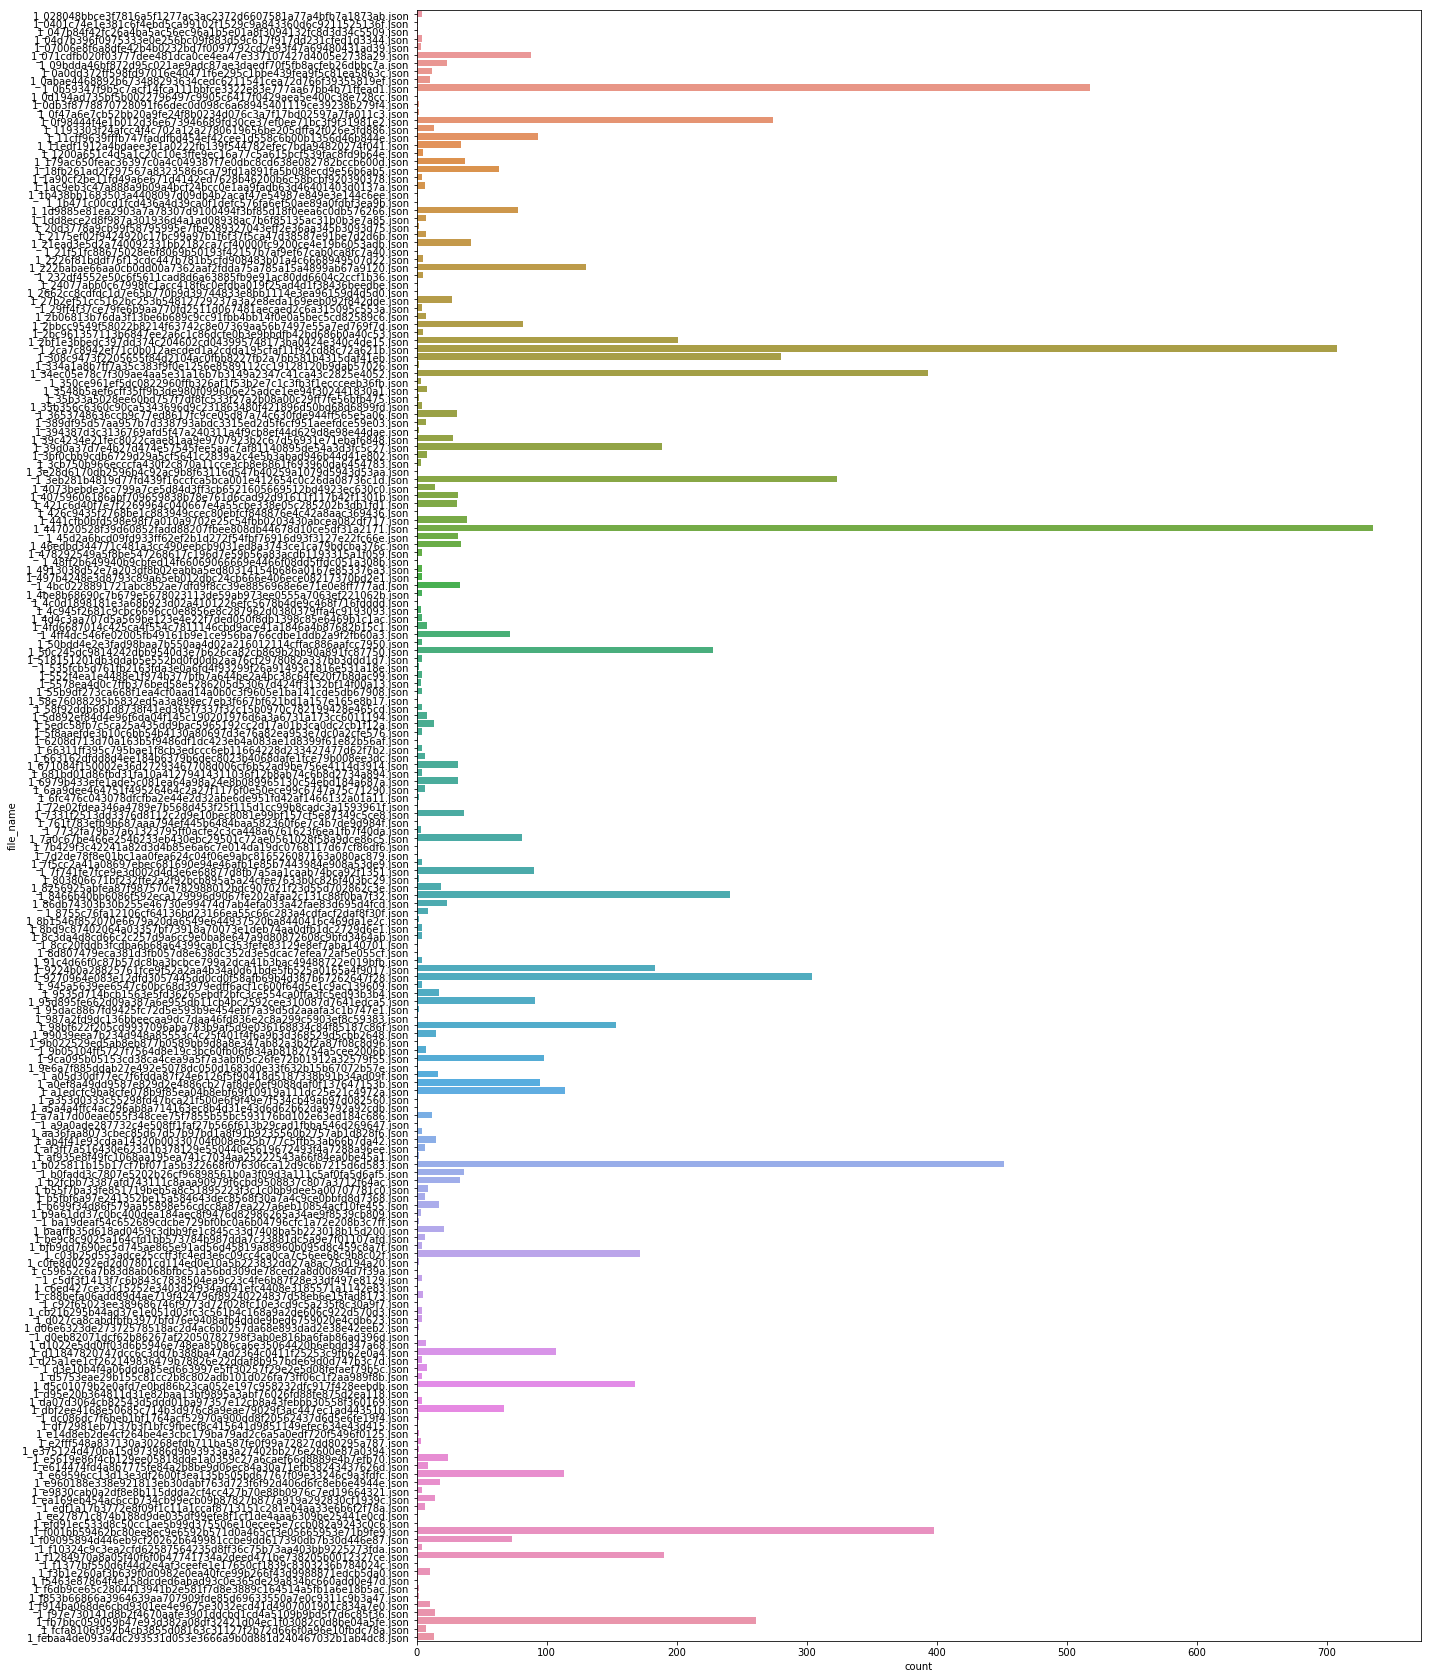

In [27]:
plt.figure(figsize=(18,30))
sns.countplot(y='file_name', data=df)

File names are not unique

In [22]:
func_counts=df['func_name'].value_counts().to_dict()
func_counts

{'': 631,
 'CE2.isMatchingSnapshot': 288,
 'zc': 285,
 'Ca': 247,
 'G': 157,
 'Xa': 146,
 'mt.sessionStorage.get': 132,
 'ra': 129,
 'a.a.r': 126,
 'i.prototype.setItem': 121,
 'IORequest.find_cookie': 108,
 'c.read': 100,
 'c': 99,
 'pd': 87,
 'i': 85,
 'Se</<.value': 84,
 'ir': 81,
 'a/h.prototype.applyShadow': 80,
 'X': 78,
 'mt.localStorage.get': 72,
 'F<.create': 71,
 't.cookie': 70,
 'cI': 70,
 'a/<': 69,
 'Kc': 68,
 'fc': 68,
 'Q<.get': 67,
 'l': 64,
 'mf': 63,
 'h': 63,
 'find_os_and_device_name': 63,
 'q.getFingerPrint': 60,
 'k': 59,
 'F<.read': 58,
 'c.create': 57,
 'g.h.get': 56,
 't.exports</LocalStorageStore.prototype.get/r<': 55,
 't.exports</LocalStorageStore.prototype.get/n<': 55,
 '.get': 54,
 'me': 54,
 '[20]</<.get': 54,
 'AppMeasurement/a.cookieRead': 54,
 'A': 52,
 'mt.sessionStorage.set': 51,
 'i/<': 49,
 't': 48,
 'window.criteo_q</t': 48,
 'i.prototype.getItem': 48,
 'd': 48,
 'getCookie': 47,
 'r': 47,
 'x': 46,
 'p': 46,
 'i.prototype.removeItem': 46,
 'Tr.pr

## Obeservations from Ghostery Study and Sample

In [23]:
loc_counts= df['filter_location'].value_counts().to_dict()
loc_counts

{'www.gap.com': 736,
 'www.officeworks.com.au': 708,
 'www.ufc.ca': 518,
 'disqus.com': 479,
 'www.backcountry.com': 452,
 'www.gartner.com': 398,
 'www.urcosme.com': 393,
 'googleads.g.doubleclick.net': 335,
 'www.newchic.com': 323,
 'www.lemonde.fr': 280,
 'www.vjav.com': 274,
 'www.facebook.com': 267,
 'zona.mobi': 261,
 'www.twilio.com': 241,
 'www.youtube.com': 223,
 'audiojungle.net': 201,
 'www.globalsources.com': 190,
 'www.leiphone.com': 183,
 'www.pwc.com': 168,
 'www.912688.com': 153,
 'www.zhcw.com': 114,
 'list.tmall.com': 113,
 'resources.depaul.edu': 107,
 'staticxx.facebook.com': 106,
 'securepubads.g.doubleclick.net': 103,
 'www.autoscout24.it': 98,
 'www.tatasky.com': 95,
 'www.cinepolis.com': 93,
 'academia.stackexchange.com': 91,
 'www.syracuse.edu': 88,
 'blog.bongacams.com': 82,
 'baike.pcauto.com.cn': 81,
 'www.akairan.com': 78,
 'ad.doubleclick.net': 77,
 'www1.folha.uol.com.br': 67,
 'www.1111.com.tw': 63,
 'porn555.com': 42,
 'imasdk.googleapis.com': 41,
 'www

According to the observations in "Tracking the Trackers <https://www.ghostery.com/lp/study/>", Google Analytics, followed by Facebook Connect, are most prevalent scripts. However, from the above observations, we can see that "gap" , followed by Officeworks, are the most common script urls in this sample. A search reveals that GAP stands for "Google Analytics Painless" which supports the article. But here the second most common script url is that of "officeworks" not "facebook". But this does ignore the various cross-domains of Facebook.

The complete study (Tracking the Trackers)<https://www.ghostery.com/wp-content/themes/ghostery/images/campaigns/tracker-study/Ghostery_Study_-_Tracking_the_Trackers.pdf> compares usage across different regions through IP addresses. To do something similar, we can find IP address through "script_url" and use it to look up for regions. 

In [28]:
import socket

In [31]:
def find_ip(s):
    ipadd=socket.gethostbyname(s)
    return ipadd

In [35]:
socket.gethostbyname(df['filter_location'][4])

'74.119.119.141'

In [36]:
df['ip_address']=df['filter_location'].apply(find_ip)

In [44]:
import urllib.request
import json

In [70]:
ip_add=df["ip_address"][5]

In [71]:
def find_country(ip):
    geoip_add="https://geoip-db.com/jsonp/"
    req=geoip_add+ip
    with urllib.request.urlopen(req) as url:
        data = url.read().decode()
        data = data.split("(")[1].strip(")")
        with_cn=data.split(',')[1]
        return with_cn.split("\"")[3]

In [72]:
find_country(ip_add)

'China'

In [73]:
df['country']=df['ip_address'].apply(find_country)

KeyboardInterrupt: 

graph for countries

Comparison of analysis and ghostery study

The sample follows some observations from ghostery study but deviates in some cases, which may be due to differences in the way data is collected. The rest of the study "Tracking the Trackers" seems to be based on the data that was collected as a part of the Ghostery extension and may not be easily implemented using the current dataset. The methodology is also not mentioned in the paper which adds to the difficulty of recreating it. 

The call_id are unique values which shows that unique values are being created. Further work would be required to determine the process of creation of these unique_ids. But since all other columns have repeated values, it suggests that unique identifier is not eaasily identified. 